In [1]:
#!/usr/bin/python3

#import pypyodbc
#import urllib
import urllib.request as urllib
import requests
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
#import mplfinance as mpf
#import matplotlib.dates as mpdates
Interval="15"

url="https://www.alphavantage.co/query?function=FX_INTRADAY&from_symbol=GBP&to_symbol=USD&interval="+Interval+"min&outputsize=full&apikey=QRNX49EZGZKYUACF&datatype=csv"
response = requests.get(url)


In [2]:
from io import BytesIO

df = pd.read_csv(BytesIO(response.content))
df_for_graph=df

In [3]:
df=df.assign(Currency= "GBPUSD")
df=df.assign(TimeFrame= Interval+"Min")



In [4]:
df[['Date', 'Time']] = df['timestamp'].str.split(' ', expand=True)

In [5]:
df.head()

,timestamp,open,high,low,close,Currency,TimeFrame,Date,Time
0,2022-11-03 18:45:00,1.11633,1.11740,1.11598,1.11643,GBPUSD,15Min,2022-11-03,18:45:00
1,2022-11-03 18:30:00,1.11705,1.11710,1.11514,1.11632,GBPUSD,15Min,2022-11-03,18:30:00
2,2022-11-03 18:15:00,1.11750,1.11795,1.11678,1.11690,GBPUSD,15Min,2022-11-03,18:15:00
3,2022-11-03 18:00:00,1.11804,1.11839,1.11726,1.11760,GBPUSD,15Min,2022-11-03,18:00:00
4,2022-11-03 17:45:00,1.11816,1.11870,1.11775,1.11808,GBPUSD,15Min,2022-11-03,17:45:00


In [6]:
df.shape[0]

968

In [7]:
df3=df


In [8]:
df3.head(10)

,timestamp,open,high,low,close,Currency,TimeFrame,Date,Time
0,2022-11-03 18:45:00,1.11633,1.11740,1.11598,1.11643,GBPUSD,15Min,2022-11-03,18:45:00
1,2022-11-03 18:30:00,1.11705,1.11710,1.11514,1.11632,GBPUSD,15Min,2022-11-03,18:30:00
2,2022-11-03 18:15:00,1.11750,1.11795,1.11678,1.11690,GBPUSD,15Min,2022-11-03,18:15:00
3,2022-11-03 18:00:00,1.11804,1.11839,1.11726,1.11760,GBPUSD,15Min,2022-11-03,18:00:00
4,2022-11-03 17:45:00,1.11816,1.11870,1.11775,1.11808,GBPUSD,15Min,2022-11-03,17:45:00
5,2022-11-03 17:30:00,1.11810,1.11889,1.11756,1.11819,GBPUSD,15Min,2022-11-03,17:30:00
6,2022-11-03 17:15:00,1.11835,1.11866,1.11739,1.11830,GBPUSD,15Min,2022-11-03,17:15:00
7,2022-11-03 17:00:00,1.11704,1.11863,1.11671,1.11834,GBPUSD,15Min,2022-11-03,17:00:00
8,2022-11-03 16:45:00,1.11772,1.11843,1.11546,1.11704,GBPUSD,15Min,2022-11-03,16:45:00
9,2022-11-03 16:30:00,1.11964,1.12027,1.11760,1.11773,GBPUSD,15Min,2022-11-03,16:30:00


In [9]:
df3.shape[0]

968

In [18]:
filt= df3["Date"] == datetime.now().isoformat()[0:10]
df4=df3.loc[filt]

In [11]:
df4

,timestamp,open,high,low,close,Currency,TimeFrame,Date,Time
0,2022-11-03 18:45:00,1.11633,1.11740,1.11598,1.11643,GBPUSD,15Min,2022-11-03,18:45:00
1,2022-11-03 18:30:00,1.11705,1.11710,1.11514,1.11632,GBPUSD,15Min,2022-11-03,18:30:00
2,2022-11-03 18:15:00,1.11750,1.11795,1.11678,1.11690,GBPUSD,15Min,2022-11-03,18:15:00
3,2022-11-03 18:00:00,1.11804,1.11839,1.11726,1.11760,GBPUSD,15Min,2022-11-03,18:00:00
4,2022-11-03 17:45:00,1.11816,1.11870,1.11775,1.11808,GBPUSD,15Min,2022-11-03,17:45:00
...,...,...,...,...,...,...,...,...,...
71,2022-11-03 01:00:00,1.13832,1.13960,1.13794,1.13933,GBPUSD,15Min,2022-11-03,01:00:00
72,2022-11-03 00:45:00,1.13777,1.13841,1.13738,1.13828,GBPUSD,15Min,2022-11-03,00:45:00
73,2022-11-03 00:30:00,1.13815,1.13834,1.13739,1.13776,GBPUSD,15Min,2022-11-03,00:30:00
74,2022-11-03 00:15:00,1.13832,1.13834,1.13722,1.13818,GBPUSD,15Min,2022-11-03,00:15:00


In [12]:
df4.shape[0]

76

In [22]:
df4.set_index('Time', inplace=True)

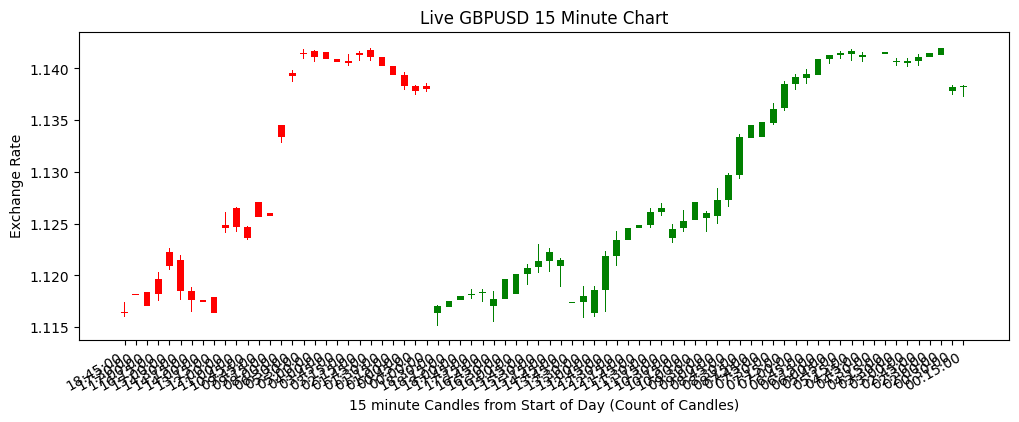

In [23]:
#plt.figure()
fig= plt.figure(figsize=(12,4))

up = df4[df4.close >= df4.open]
down = df4[df4.close < df4.open]

col1= 'red'
col2 = 'green'

# Setting width of candlestick elements
#width = .3
#width2 = .03
width = .6
width2 = .06

# Plotting up prices of the stock
plt.bar(up.index, up.close-up.open, width, bottom=up.open, color=col1)
plt.bar(up.index, up.high-up.close, width2, bottom=up.close, color=col1)
plt.bar(up.index, up.low-up.open, width2, bottom=up.open, color=col1)

# Plotting down prices of the stock
plt.bar(down.index, down.close-down.open, width, bottom=down.open, color=col2)
plt.bar(down.index, down.high-down.open, width2, bottom=down.open, color=col2)
plt.bar(down.index, down.low-down.close, width2, bottom=down.close, color=col2)

# rotating the x-axis tick labels at 30degree
# towards right
#plt.xticks(np.arange(0, 24, step=4))
plt.xticks(rotation=30, ha='right')

# displaying candlestick chart of stock data
# of a week
plt.title("Live GBPUSD "+Interval+" Minute Chart")
plt.xlabel(Interval+' minute Candles from Start of Day (Count of Candles)')
plt.ylabel('Exchange Rate')

#plt.annotate("Start of Trading Session", xy=(745, 1.1405), xytext=(730, 1.15), arrowprops={"arrowstyle":"->", "color":"blue"})
#plt.annotate("News Event", xy=(795, 1.15), xytext=(780, 1.14), arrowprops={"arrowstyle":"->", "color":"blue"})
plt.plot()
plt.savefig('1min-2.png')
plt.show()

In [15]:
df4

,timestamp,open,high,low,close,Currency,TimeFrame,Date
Time,,,,,,,,
18:45:00,2022-11-03 18:45:00,1.11633,1.11740,1.11598,1.11643,GBPUSD,15Min,2022-11-03
18:30:00,2022-11-03 18:30:00,1.11705,1.11710,1.11514,1.11632,GBPUSD,15Min,2022-11-03
18:15:00,2022-11-03 18:15:00,1.11750,1.11795,1.11678,1.11690,GBPUSD,15Min,2022-11-03
18:00:00,2022-11-03 18:00:00,1.11804,1.11839,1.11726,1.11760,GBPUSD,15Min,2022-11-03
17:45:00,2022-11-03 17:45:00,1.11816,1.11870,1.11775,1.11808,GBPUSD,15Min,2022-11-03
...,...,...,...,...,...,...,...,...
01:00:00,2022-11-03 01:00:00,1.13832,1.13960,1.13794,1.13933,GBPUSD,15Min,2022-11-03
00:45:00,2022-11-03 00:45:00,1.13777,1.13841,1.13738,1.13828,GBPUSD,15Min,2022-11-03
00:30:00,2022-11-03 00:30:00,1.13815,1.13834,1.13739,1.13776,GBPUSD,15Min,2022-11-03
